In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential

In [2]:
mnist = keras.datasets.mnist

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
# normalize : 0, 255 -> 0,1
X_train, X_test = X_train/255. , X_test/255.

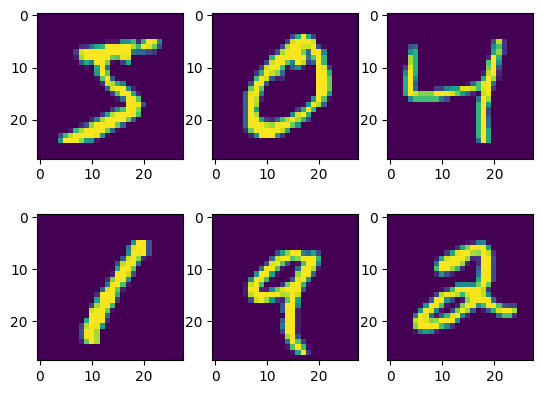

In [6]:
for i in range(6) :
  plt.subplot(2,3, i + 1)
  plt.imshow(X_train[i])

plt.show()

In [12]:
model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10)
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape = (28,28)))

model.add(keras.layers.Dense(128, activation = 'relu'))

model.add(keras.layers.Dense(10))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True)

optim = keras.optimizers.Adam(lr = 0.001)

metrics = ['accuracy']

model.compile(loss = loss, optimizer = optim, metrics = metrics)

In [21]:
batch_size = 0
epochs = 5

model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, shuffle = True, verbose = 2)

Epoch 1/5
1875/1875 - 7s - loss: 0.0601 - accuracy: 0.9814 - 7s/epoch - 4ms/step
Epoch 2/5
1875/1875 - 6s - loss: 0.0417 - accuracy: 0.9870 - 6s/epoch - 3ms/step
Epoch 3/5
1875/1875 - 7s - loss: 0.0337 - accuracy: 0.9894 - 7s/epoch - 4ms/step
Epoch 4/5
1875/1875 - 6s - loss: 0.0270 - accuracy: 0.9915 - 6s/epoch - 3ms/step
Epoch 5/5
1875/1875 - 7s - loss: 0.0222 - accuracy: 0.9930 - 7s/epoch - 4ms/step


In [20]:
model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 2)

157/157 - 2s - loss: 0.0761 - accuracy: 0.9762 - 2s/epoch - 11ms/step


[0.07609569281339645, 0.9761999845504761]